In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/HealthInsurance/train.csv')

In [3]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [5]:
(df.isna().sum()/len(df))*100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [6]:
df.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [7]:
for ele in df.columns:
  print(ele)
  print(df[ele].value_counts().count())

ID
50882
City_Code
36
Region_Code
5316
Accomodation_Type
2
Reco_Insurance_Type
2
Upper_Age
58
Lower_Age
60
Is_Spouse
2
Health Indicator
9
Holding_Policy_Duration
15
Holding_Policy_Type
4
Reco_Policy_Cat
22
Reco_Policy_Premium
6977
Response
2


In [8]:
df['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [9]:
df['Response'].mean()

0.2399473291144216

In [10]:
df = df.dropna()

In [11]:
df['Response'].mean()

0.2420587735688806

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23548 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       23548 non-null  int64  
 1   City_Code                23548 non-null  object 
 2   Region_Code              23548 non-null  int64  
 3   Accomodation_Type        23548 non-null  object 
 4   Reco_Insurance_Type      23548 non-null  object 
 5   Upper_Age                23548 non-null  int64  
 6   Lower_Age                23548 non-null  int64  
 7   Is_Spouse                23548 non-null  object 
 8   Health Indicator         23548 non-null  object 
 9   Holding_Policy_Duration  23548 non-null  object 
 10  Holding_Policy_Type      23548 non-null  float64
 11  Reco_Policy_Cat          23548 non-null  int64  
 12  Reco_Policy_Premium      23548 non-null  float64
 13  Response                 23548 non-null  int64  
dtypes: float64(2), int64(6

In [13]:
for ele in df.columns:
  print(ele)
  print(df[ele].value_counts().count())

ID
23548
City_Code
36
Region_Code
4760
Accomodation_Type
2
Reco_Insurance_Type
2
Upper_Age
55
Lower_Age
60
Is_Spouse
2
Health Indicator
9
Holding_Policy_Duration
15
Holding_Policy_Type
4
Reco_Policy_Cat
22
Reco_Policy_Premium
5417
Response
2


In [14]:
df = df.drop('ID', axis=1)

In [15]:
df['City_Code'].value_counts()

C1     4397
C2     3800
C3     2249
C4     1577
C9      932
C7      902
C8      843
C6      831
C10     764
C5      615
C15     576
C17     533
C11     515
C16     456
C20     435
C13     431
C19     407
C12     396
C21     351
C18     351
C14     335
C24     290
C23     244
C22     227
C26     225
C29     168
C25     165
C28     131
C27     116
C33     103
C32      59
C34      51
C30      27
C35      24
C36      15
C31       7
Name: City_Code, dtype: int64

In [16]:
df['Region_Code'].value_counts()

1       47
4       41
5       38
6       36
7       35
        ..
4081     1
5150     1
4941     1
4195     1
5450     1
Name: Region_Code, Length: 4760, dtype: int64

In [17]:
df.duplicated().any()

False

In [18]:
df.describe()

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,23548.000000,23548.000000,23548.000000,23548.000000,23548.000000,23548.000000,23548.000000
mean,1731.704051,48.864192,46.365381,2.437574,15.207364,15409.000161,0.242059
std,1435.834257,16.021466,16.578403,1.025915,6.326014,6416.327319,0.428339
min,1.000000,21.000000,16.000000,1.000000,1.000000,3216.000000,0.000000
25%,516.000000,35.000000,32.000000,1.000000,12.000000,10704.000000,0.000000
50%,1381.000000,49.000000,46.000000,3.000000,17.000000,14580.000000,0.000000
75%,2672.000000,62.000000,60.000000,3.000000,20.000000,19140.000000,0.000000
max,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [19]:
X = df.drop('Response', axis=1)
y = df['Response']

In [20]:
num_df = X.select_dtypes(include='number')
cat_df = X.select_dtypes(include='object')

In [21]:
num_df.skew()

Region_Code            0.805851
Upper_Age              0.032461
Lower_Age              0.107714
Holding_Policy_Type   -0.199834
Reco_Policy_Cat       -0.954477
Reco_Policy_Premium    0.724116
dtype: float64

In [22]:
def unique_counts(var):
    counts = var.value_counts().count()
    return counts
unique_df = pd.DataFrame(num_df.apply(lambda x:unique_counts(x)), columns=['count'])
unique_df

,count
Region_Code,4760
Upper_Age,55
Lower_Age,60
Holding_Policy_Type,4
Reco_Policy_Cat,22
Reco_Policy_Premium,5417


In [23]:
slice1 = unique_df[unique_df['count']<=20]
cat_list = slice1.index
cat = num_df.loc[:,cat_list]
cat.dtypes

Holding_Policy_Type    float64
dtype: object

In [24]:
slice2 = unique_df[unique_df['count']>20]
num_list=slice2.index
num=num_df.loc[:,num_list]
num.dtypes

Region_Code              int64
Upper_Age                int64
Lower_Age                int64
Reco_Policy_Cat          int64
Reco_Policy_Premium    float64
dtype: object

In [25]:
char=pd.concat([cat_df,cat],axis=1,join="inner")
char.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type
0,C3,Rented,Individual,No,X1,14+,3.0
3,C24,Owned,Joint,No,X1,14+,3.0
4,C8,Rented,Individual,No,X2,3.0,1.0
5,C9,Rented,Individual,No,X2,5.0,1.0
7,C1,Owned,Joint,Yes,X4,9.0,4.0


In [26]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,0.95,0.99])

,Region_Code,Upper_Age,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium
count,23548.000000,23548.000000,23548.000000,23548.000000,23548.000000
mean,1731.704051,48.864192,46.365381,15.207364,15409.000161
std,1435.834257,16.021466,16.578403,6.326014,6416.327319
min,1.000000,21.000000,16.000000,1.000000,3216.000000
1%,8.000000,22.000000,17.000000,1.000000,4723.760000
5%,58.000000,25.000000,22.000000,2.000000,6370.000000
10%,146.000000,27.000000,25.000000,4.000000,7788.000000
25%,516.000000,35.000000,32.000000,12.000000,10704.000000
50%,1381.000000,49.000000,46.000000,17.000000,14580.000000
75%,2672.000000,62.000000,60.000000,20.000000,19140.000000


In [27]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.05))
    x=x.clip(upper=x.quantile(0.95))
    return(x)

In [28]:
num=num.apply(lambda x : outlier_cap(x))

In [29]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,0.95,0.99])

,Region_Code,Upper_Age,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium
count,23548.000000,23548.000000,23548.000000,23548.000000,23548.000000
mean,1704.632088,48.963946,46.481697,15.247452,15284.895461
std,1366.489843,15.863967,16.391002,6.238412,5887.434774
min,58.000000,25.000000,22.000000,2.000000,6370.000000
1%,58.000000,25.000000,22.000000,2.000000,6370.000000
5%,58.000000,25.000000,22.000000,2.000000,6370.000000
10%,146.000000,27.000000,25.000000,4.000000,7788.000000
25%,516.000000,35.000000,32.000000,12.000000,10704.000000
50%,1381.000000,49.000000,46.000000,17.000000,14580.000000
75%,2672.000000,62.000000,60.000000,20.000000,19140.000000


In [30]:
from sklearn.preprocessing import KBinsDiscretizer
kbin = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
num_binned = pd.DataFrame(kbin.fit_transform(num), index=num.index, columns=num.columns,).add_suffix('_rank')
num_binned.head()

,Region_Code_rank,Upper_Age_rank,Lower_Age_rank,Reco_Policy_Cat_rank,Reco_Policy_Premium_rank
0,8.0,2.0,3.0,8.0,3.0
3,9.0,5.0,5.0,7.0,6.0
4,6.0,4.0,4.0,4.0,2.0
5,5.0,5.0,6.0,8.0,5.0
7,8.0,9.0,9.0,5.0,9.0


In [31]:
num_combined = pd.concat([num, y], axis=1, join='inner')

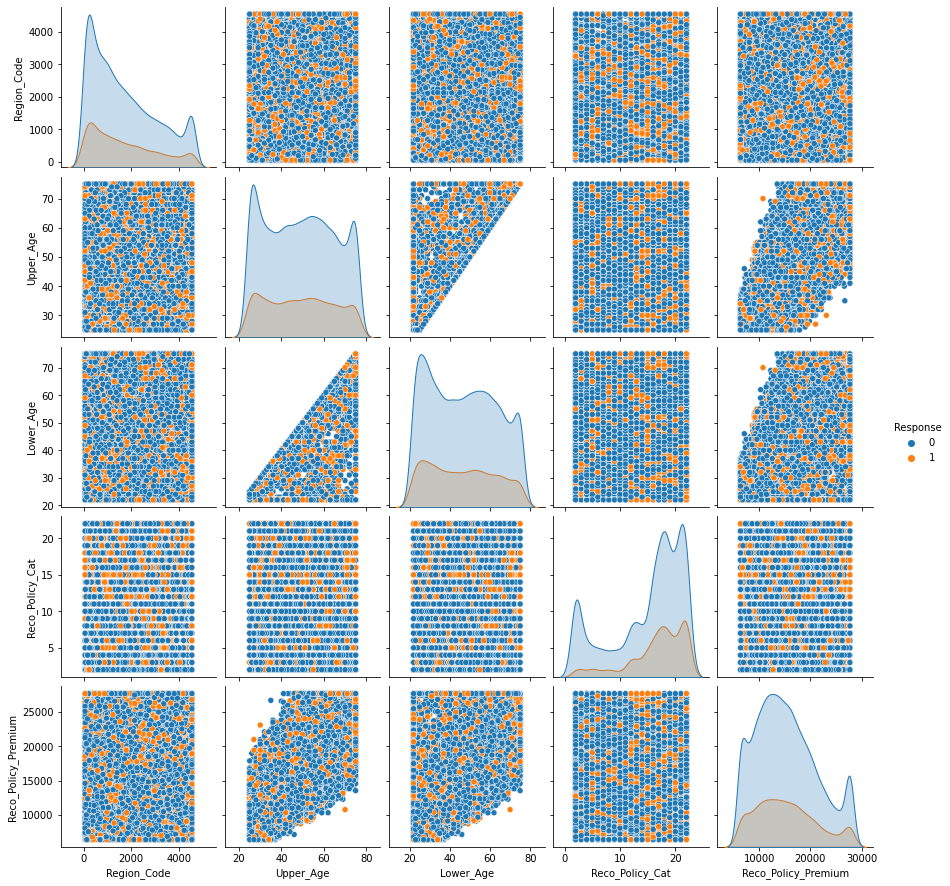

In [32]:
sns.pairplot(data=num_combined, hue='Response')

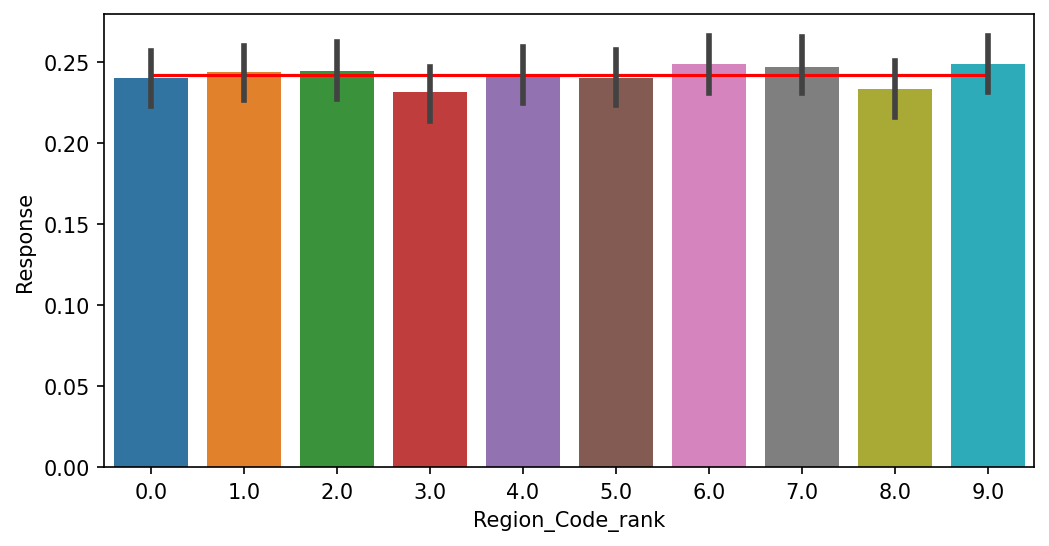

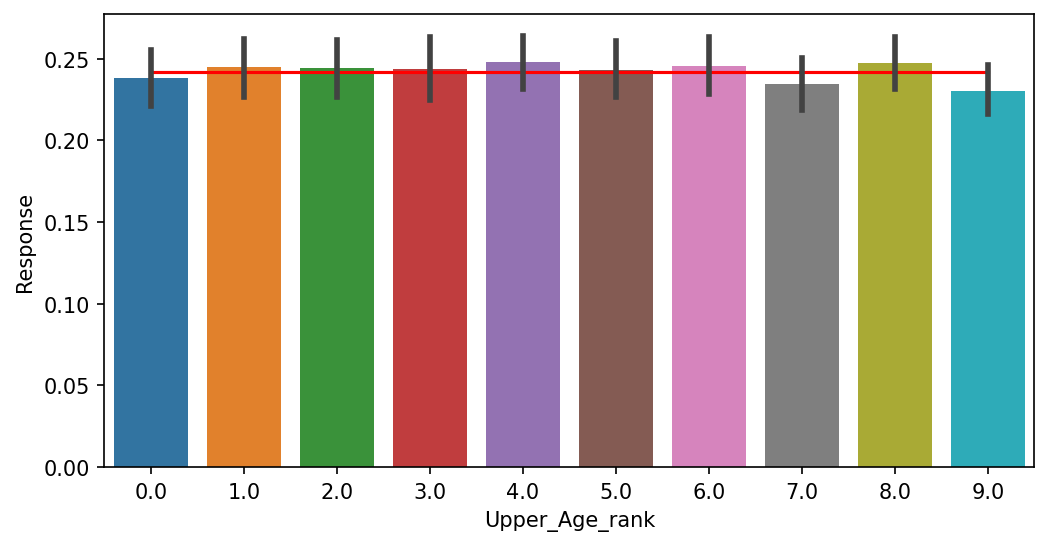

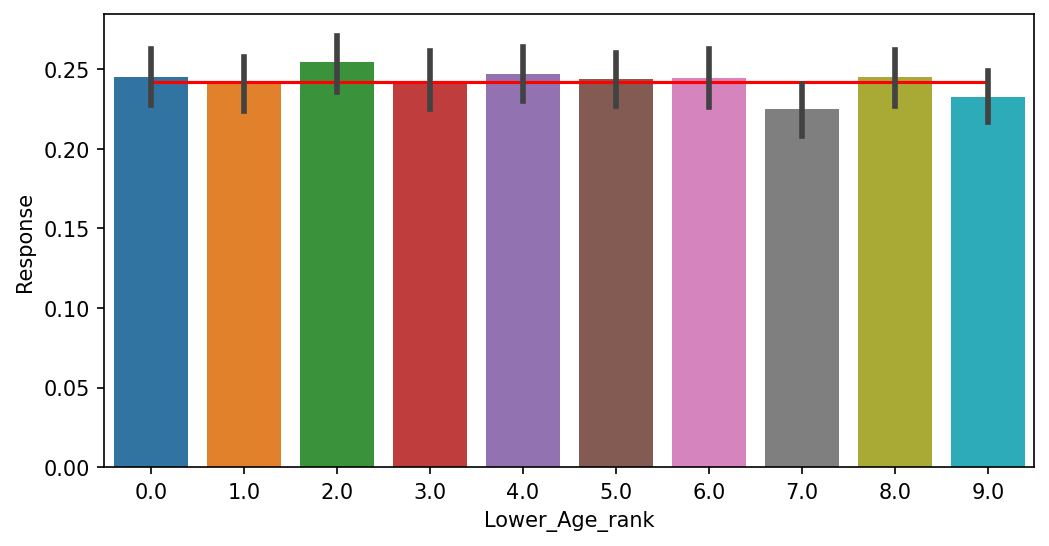

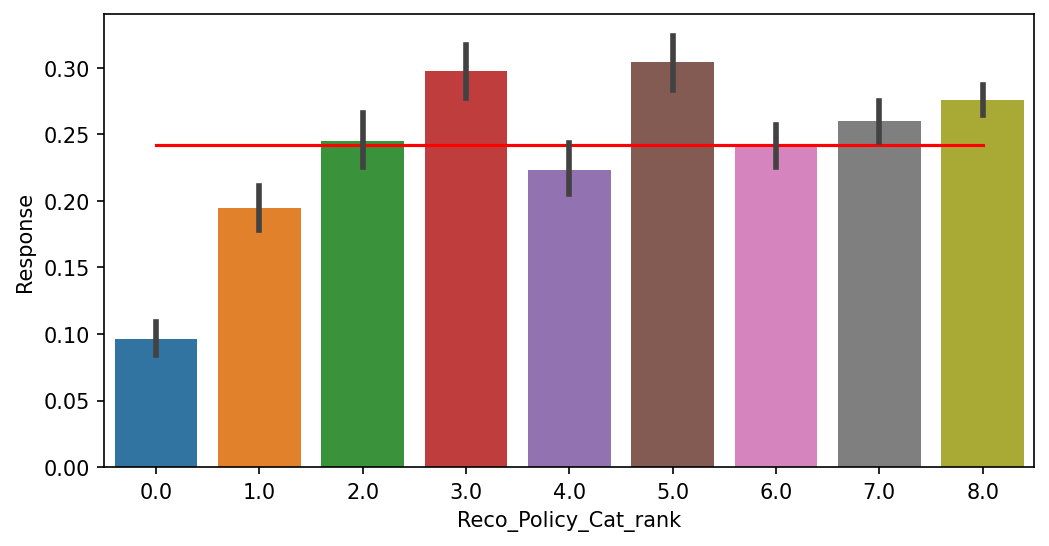

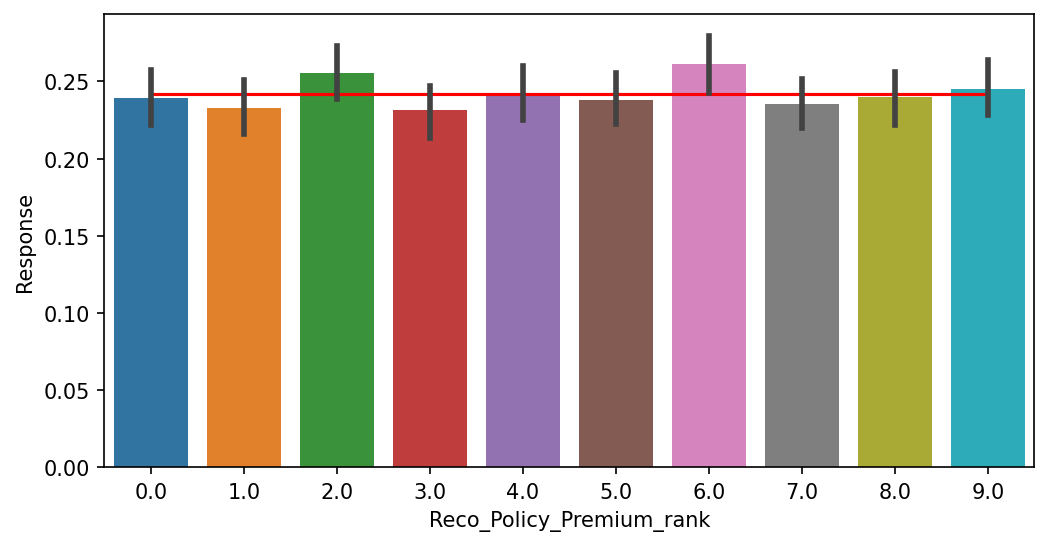

In [33]:
X_bin_combined = pd.concat([num_binned, y], axis=1, join='inner')
for col in num_binned.columns:
    plt.figure(figsize=(8,4), dpi=150)
    sns.lineplot(x=col, y=y.mean(), data=X_bin_combined, color='red')
    sns.barplot(x=col, y='Response', data=X_bin_combined, estimator=np.mean)
plt.show()

In [34]:
num.corr()

,Region_Code,Upper_Age,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium
Region_Code,1.000000,-0.007699,-0.005586,-0.061379,-0.008612
Upper_Age,-0.007699,1.000000,0.905736,0.026166,0.763298
Lower_Age,-0.005586,0.905736,1.000000,0.023868,0.555067
Reco_Policy_Cat,-0.061379,0.026166,0.023868,1.000000,0.062473
Reco_Policy_Premium,-0.008612,0.763298,0.555067,0.062473,1.000000


In [35]:
num = num.drop('Upper_Age', axis=1)

In [36]:
num.corr()

,Region_Code,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium
Region_Code,1.000000,-0.005586,-0.061379,-0.008612
Lower_Age,-0.005586,1.000000,0.023868,0.555067
Reco_Policy_Cat,-0.061379,0.023868,1.000000,0.062473
Reco_Policy_Premium,-0.008612,0.555067,0.062473,1.000000


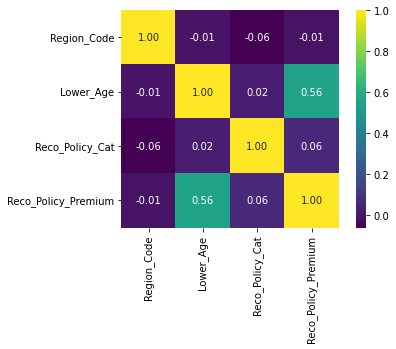

In [37]:
sns.heatmap(num.corr(), fmt='.2f', square=True, annot=True, cmap='viridis')

In [38]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
char_unique_levels=pd.DataFrame(char.apply(lambda x : unique_levels(x)))

In [39]:
char_unique_levels.columns=['feature_levels']
slice1=char_unique_levels[char_unique_levels['feature_levels']>1]
cat_list=slice1.index
char=char.loc[:,cat_list]
char.dtypes

City_Code                   object
Accomodation_Type           object
Reco_Insurance_Type         object
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
dtype: object

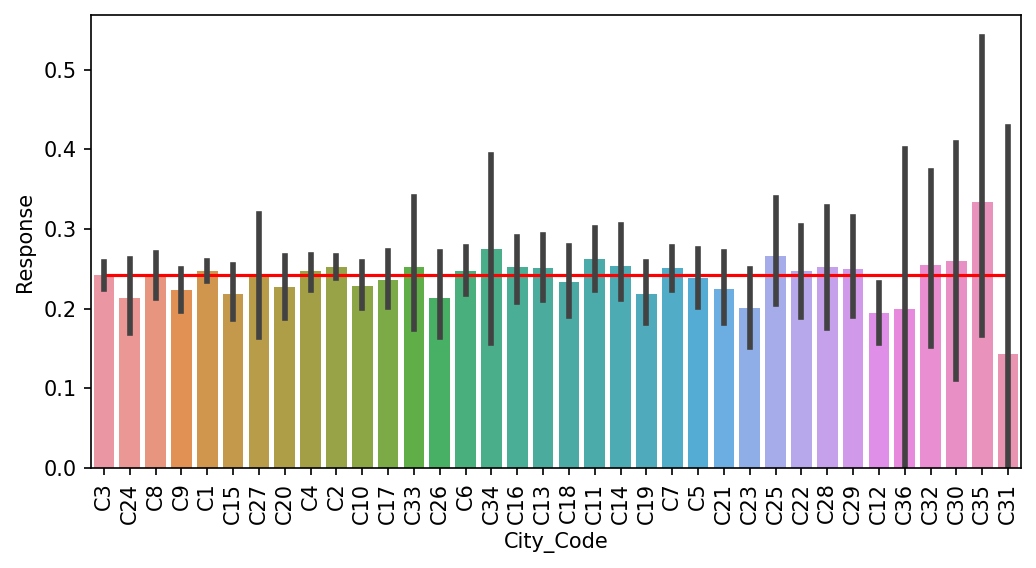

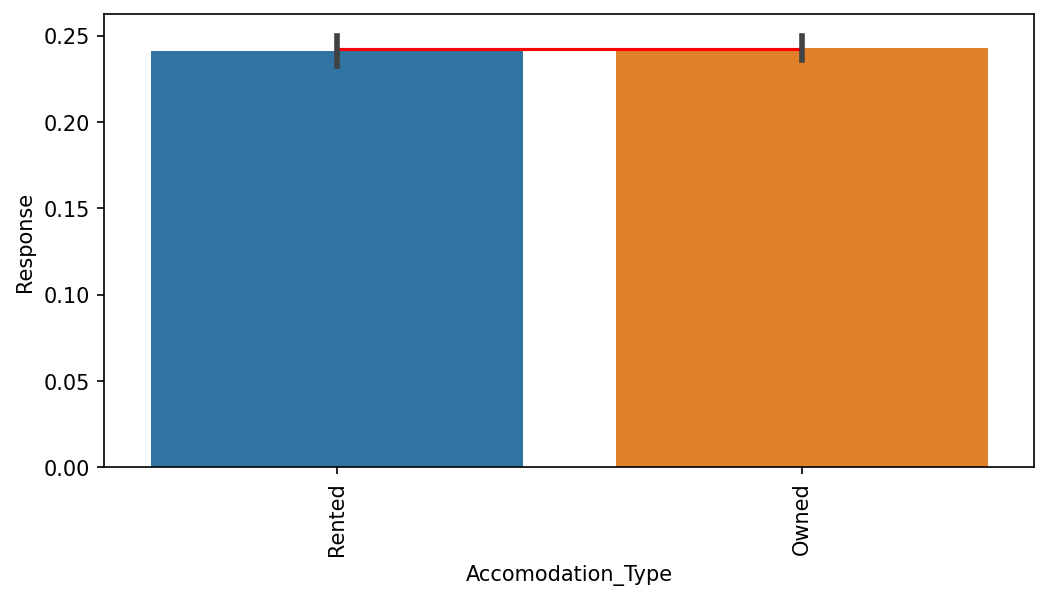

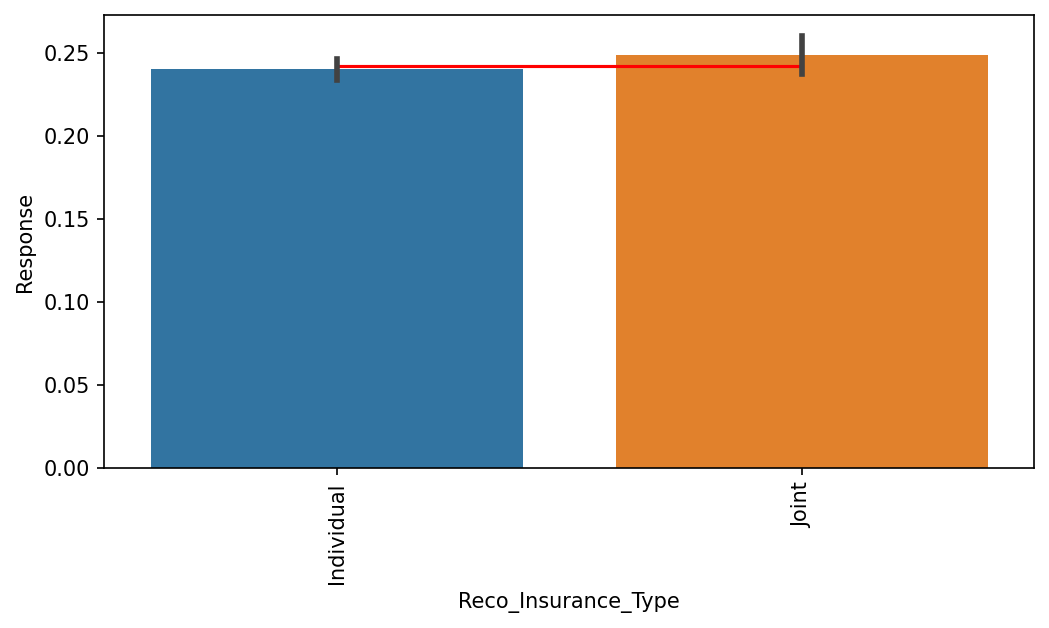

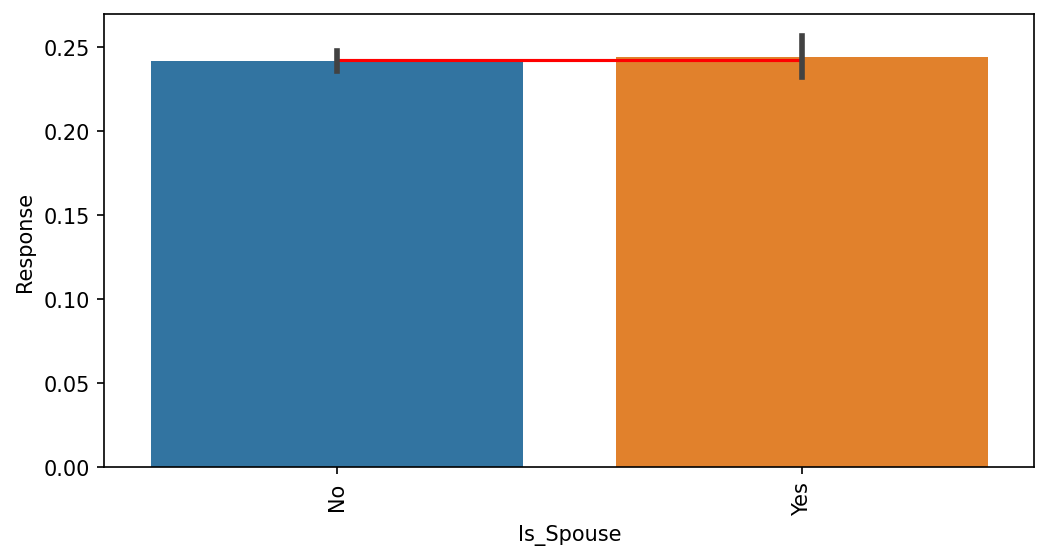

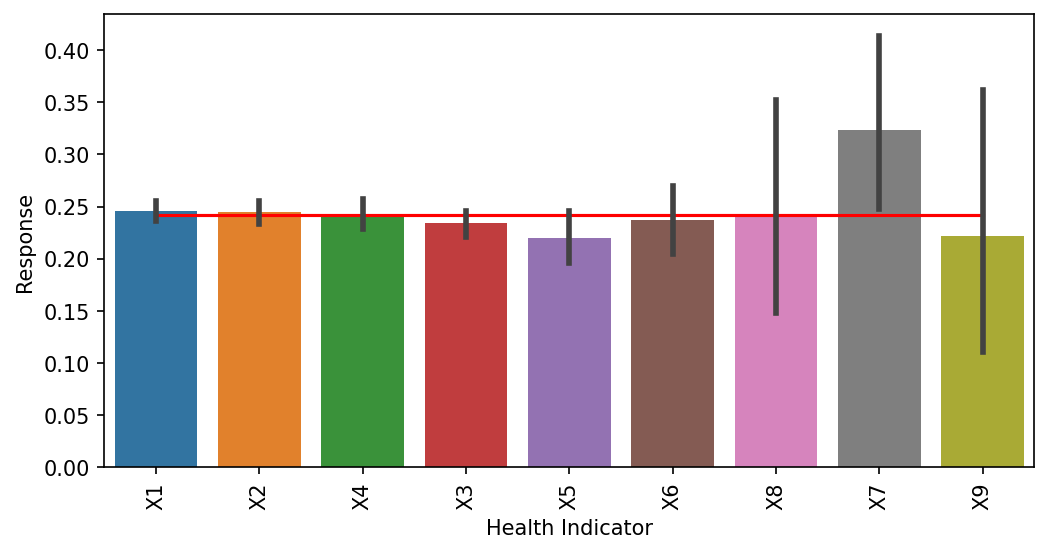

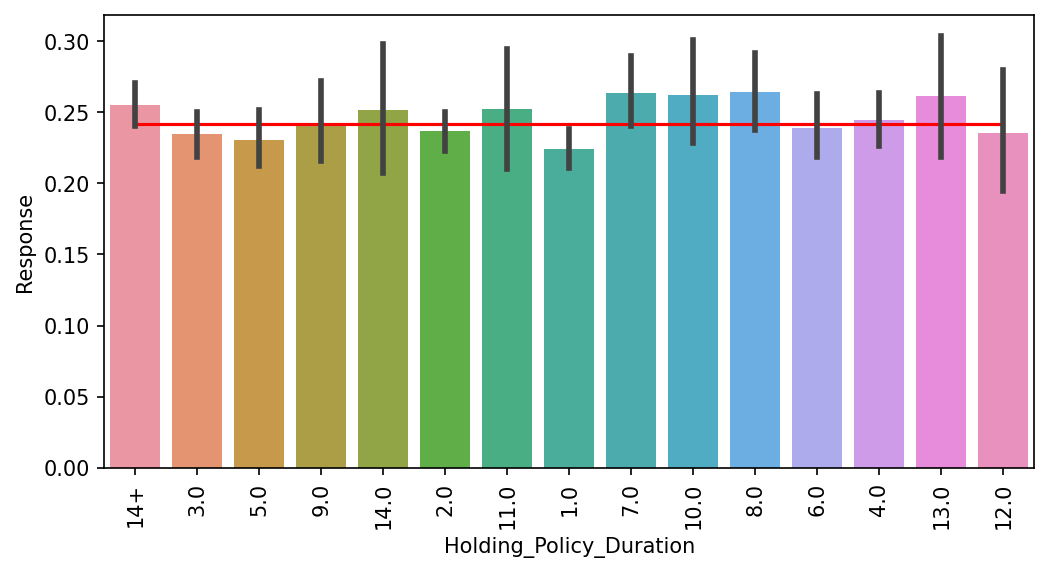

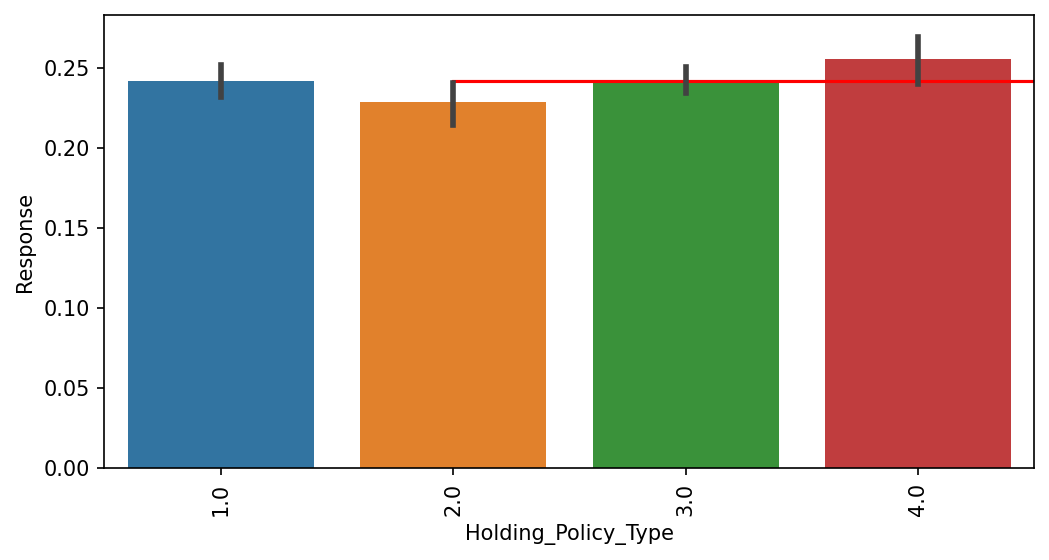

In [40]:
X_char_merged=pd.concat([char, y],axis=1,join='inner')

for col in char.columns:
    plt.figure(figsize=(8, 4), dpi=150)
    sns.lineplot(x=col, y=y.mean(), data=X_char_merged, color='red')
    sns.barplot(x=col, y='Response', data=X_char_merged, estimator=np.mean)
    plt.xticks(rotation=90)
plt.show()

In [41]:
char.dtypes

City_Code                   object
Accomodation_Type           object
Reco_Insurance_Type         object
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
dtype: object

In [42]:
char['Holding_Policy_Type'] = char['Holding_Policy_Type'].astype('object')

In [43]:
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(23548, 63)

In [44]:
X_char_dum.head()

,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,...,Holding_Policy_Duration_3.0,Holding_Policy_Duration_4.0,Holding_Policy_Duration_5.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_7.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_9.0,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [45]:
X_all = pd.concat([num, X_char_dum], axis=1, join="inner")

In [46]:
X_all.head()

,Region_Code,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,...,Holding_Policy_Duration_3.0,Holding_Policy_Duration_4.0,Holding_Policy_Duration_5.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_7.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_9.0,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0
0,3213.0,36.0,22.0,11628.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4378.0,48.0,19.0,17780.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2190.0,44.0,16.0,10404.00,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,1785.0,52.0,22.0,15264.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,3175.0,73.0,17.0,27704.34,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, y, test_size=0.2, random_state=101)

In [48]:
print("Shape of Training Data", X_train.shape)
print("Shape of Testing Data", X_test.shape)
print("Response Rate in Training Data", y_train.mean())
print("Response Rate in Testing Data", y_test.mean())

Shape of Training Data (18838, 67)
Shape of Testing Data (4710, 67)
Response Rate in Training Data 0.24280709204798812
Response Rate in Testing Data 0.23906581740976646


In [49]:
# Building a Decision Tree Model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=101)

In [50]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 4, 5], 
              'min_samples_split': [20, 25],
              'min_samples_leaf' : [30, 35, 40]
             }
tree_grid = GridSearchCV(dtree, cv=10, param_grid=param_grid, scoring='accuracy')
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 40, 'min_samples_split': 20}


In [51]:
dtree.set_params(criterion='gini', max_depth=4, min_samples_leaf=40, min_samples_split=20)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=40, min_samples_split=20,
                       random_state=101)

In [52]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=40, min_samples_split=20,
                       random_state=101)

In [53]:
pred = dtree.predict(X_test)

In [54]:
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve

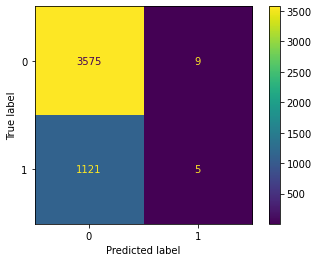

In [55]:
plot_confusion_matrix(dtree, X_test, y_test)

In [56]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3584
           1       0.36      0.00      0.01      1126

    accuracy                           0.76      4710
   macro avg       0.56      0.50      0.44      4710
weighted avg       0.66      0.76      0.66      4710



In [57]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [58]:
rforest = RandomForestClassifier(random_state=101, oob_score=True)

In [59]:
# param_grid = {'criterion': ['gini', 'entropy'],
#               'max_depth': [3, 4, 5], 
#               'min_samples_split': [20, 25],
#               'min_samples_leaf' : [30, 35, 40]
#              }
# rforest_grid = GridSearchCV(rforest, cv=10, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
# rforest_grid.fit(X_train,y_train) 
# print('Best Parameters using grid search: \n', rforest_grid.best_params_)

In [60]:
# rforest.set_params(criterion = 'gini',
#                   min_samples_leaf = 30,
#                   min_samples_split = 20,
#                   max_depth = 3,
#                   warm_start = True)

In [61]:
# min_estimators = 200
# max_estimators = 1000

# error_rate = {}

# for i in range(min_estimators, max_estimators + 1):
#     rforest.set_params(n_estimators=i)
#     rforest.fit(X_train, y_train)

#     oob_error = 1 - rforest.oob_score_
#     error_rate[i] = oob_error

In [62]:
# oob_series = pd.Series(error_rate)
# fig, ax = plt.subplots(figsize=(10, 10))

# ax.set_facecolor('#fafafa')

# oob_series.plot(kind='line',color = 'red')
# plt.xlabel('n_estimators')
# plt.ylabel('OOB Error Rate')
# plt.xlim(200, 1000)
# plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 200 trees)')

In [63]:
# print('OOB Error rate for 200 trees is: {0:.5f}'.format(oob_series[200]))

In [64]:
# rforest.set_params(n_estimators=15,
#                   bootstrap = True,
#                   warm_start=False, 
#                   oob_score=False)

In [65]:
# rforest.fit(X_train, y_train)

In [66]:
# rforest_pred = rforest.predict(X_test)

In [67]:
# plot_confusion_matrix(rforest, X_test, y_test)

In [68]:
from sklearn.svm import SVC

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [70]:
svm_model = SVC(class_weight='balanced', random_state=101,)

In [71]:
param_grid = {'C': [1.0, 10.0, 100.0],
              'kernel': ['rbf', 'poly'],
              'degree': [2, 3],
            }

In [72]:
svm_grid = GridSearchCV(svm_model, cv=10, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
svm_grid.fit(scaled_X_train, y_train)
print('Best Parameters using grid search: \n', svm_grid.best_params_)

Best Parameters using grid search: 
 {'C': 100.0, 'degree': 2, 'kernel': 'rbf'}


In [73]:
svm_model.set_params(C=100.0, degree=2, kernel='rbf')

SVC(C=100.0, class_weight='balanced', degree=2, random_state=101)

In [74]:
svm_model.fit(scaled_X_train, y_train)

SVC(C=100.0, class_weight='balanced', degree=2, random_state=101)

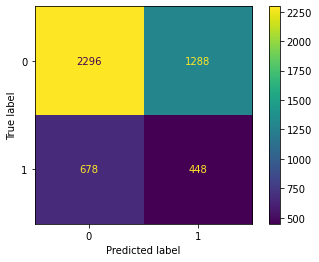

In [75]:
plot_confusion_matrix(svm_model, scaled_X_test, y_test)

In [77]:
pred = svm_model.predict(scaled_X_test)

In [78]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70      3584
           1       0.26      0.40      0.31      1126

    accuracy                           0.58      4710
   macro avg       0.52      0.52      0.51      4710
weighted avg       0.65      0.58      0.61      4710



In [79]:
from sklearn.linear_model import LogisticRegressionCV

In [80]:
model = LogisticRegressionCV(cv=10, class_weight='balanced', n_jobs=-1, solver='saga', max_iter=1000000)

In [81]:
model.fit(scaled_X_train, y_train)

LogisticRegressionCV(class_weight='balanced', cv=10, max_iter=1000000,
                     n_jobs=-1, solver='saga')

In [82]:
y_pred = model.predict(scaled_X_test)

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.46      0.58      3584
           1       0.26      0.60      0.36      1126

    accuracy                           0.49      4710
   macro avg       0.52      0.53      0.47      4710
weighted avg       0.66      0.49      0.53      4710



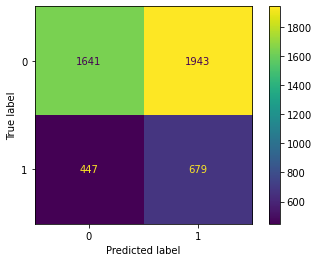

In [84]:
plot_confusion_matrix(model, scaled_X_test, y_test)

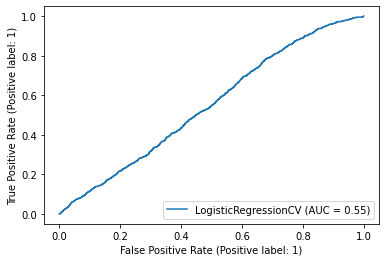

In [85]:
plot_roc_curve(model, scaled_X_test, y_test)

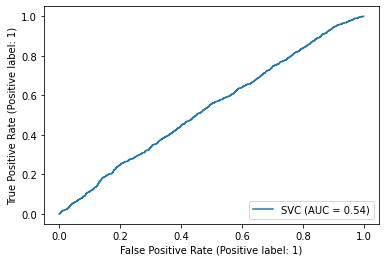

In [87]:
plot_roc_curve(svm_model, scaled_X_test, y_test)

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train, y_train)
    pred_i = knn.predict(scaled_X_test)
    error.append(np.mean(pred_i != y_test))

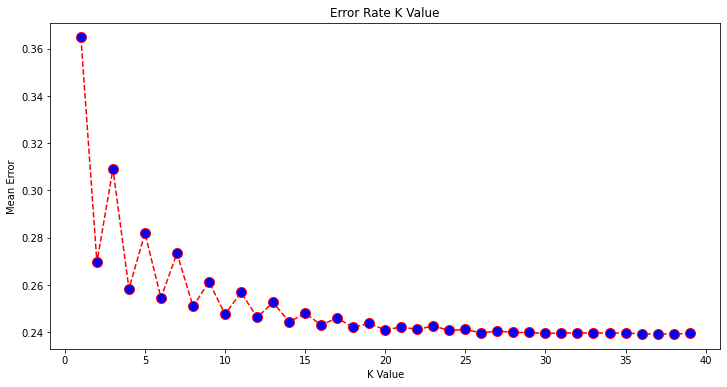

In [90]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()

In [92]:
classifier = KNeighborsClassifier(n_neighbors=20)  
classifier.fit(scaled_X_train, y_train)  

KNeighborsClassifier(n_neighbors=20)

In [94]:
y_pred = classifier.predict(scaled_X_test)  

In [95]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[3571   13]
 [1122    4]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3584
           1       0.24      0.00      0.01      1126

    accuracy                           0.76      4710
   macro avg       0.50      0.50      0.43      4710
weighted avg       0.64      0.76      0.66      4710



In [ ]:
#svm model and Logistic Regression performs well in determining the Response as 1